# 多元线性回归

## 波士顿房价问题

In [235]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import scale

print(tf.__version__)

2.7.0


|       |                       |         |                  |
|:-----:|:---------------------:|:-------:|:----------------:|
| CRIM  |        城镇人均犯罪率        |   AGE   | 1940年之前建成的自用房屋比例 |
|  ZN   | 住宅用地超过25000 sq.ft 的比例 |   DIS   | 到波士顿5个中心区域的加权距离  |
| INDUS |     城镇非零售商用土地的比例      |   RAD   |    辐射性公路的靠近指数    |
| CHAS  |     边界是河流为1，否则为0      |   TAX   | 每10000美元的全值财产税率  |
|  NOX  |        一氧化氮浓度         | PTRATIO |      城镇师生比例      |
|  RM   |        住宅平均房间数        |  LSTAT  |   人口中地位低下者的比例    |
|       |                       |  MEDV   | 自主房的平均房价，单位：千美元  |

In [209]:
# 读取数据文件
df = pd.read_csv("Data/boston.csv", header=0)

# 显示数据摘要信息
print(df.describe())

             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

In [210]:
# 显示所有数据
print(df)

        CRIM   ZN   INDUS   CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0    2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0    7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0    7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0    2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0    2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...     ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0   11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0   11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0   11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0   11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0   11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  

In [211]:
# 只显示前3条数据
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7


In [212]:
# 只显示后3条数据
df.tail(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


In [213]:
# 获取数据集的值，df.values将以np.array形式返回数据集的值
ds = df.values

In [214]:
# 查看数据形状
# 506行，13列的二维数组
print(ds.shape)

(506, 13)


In [215]:
# 查看数据集的值
print(ds)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 7.8800e+00 1.1900e+01]]


## 特征数据归一化

In [216]:
# 如有以下例子：
# 制作一份鸡汤，需要用到鸡、水、姜、葱、蒜、盐等材料，但材料间的取值范围均不相同
# 水的取值范围可能在2000克到3000克，但相比较之下盐可能仅需要1克2克，这样的取值范围在多元线性回归中是不合理的
#
# 为防止不同特征值取值范围之间的差异性，需要对特征数据进行归一化
# 归一化过程：[特征值 / max(特征值) - min(特征值)]

# x_data 为前12列特征数据
x_data = ds[:, :12]  # [:, :12]表示从0~11列

# y_data 为最后1列标签数据
y_data = ds[:, 12]  # [:, 12]表示第12列

# 对特征数据【0到11】列进行归一化（缩小差异区间至0~1）处理
for i in range(12):
    x_data[:, i] = x_data[:, i] / (x_data[:, i].max() - x_data[:, i].min())

In [217]:
print(x_data, "\n shape =", x_data.shape)

[[7.10352762e-05 1.80000000e-01 8.46774194e-02 ... 5.64885496e-01
  1.62765957e+00 1.37417219e-01]
 [3.06957815e-04 0.00000000e+00 2.59164223e-01 ... 4.61832061e-01
  1.89361702e+00 2.52207506e-01]
 [3.06733020e-04 0.00000000e+00 2.59164223e-01 ... 4.61832061e-01
  1.89361702e+00 1.11203091e-01]
 ...
 [6.82927750e-04 0.00000000e+00 4.37316716e-01 ... 5.20992366e-01
  2.23404255e+00 1.55629139e-01]
 [1.23176518e-03 0.00000000e+00 4.37316716e-01 ... 5.20992366e-01
  2.23404255e+00 1.78807947e-01]
 [5.32876969e-04 0.00000000e+00 4.37316716e-01 ... 5.20992366e-01
  2.23404255e+00 2.17439294e-01]] 
 shape = (506, 12)


In [218]:
print(y_data, "\n shape =", y_data.shape)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

## 划分数据集：训练集、验证集和测试集

In [219]:
# 训练集
train_num = 300

# 验证集
valid_num = 100

# 测试集 = 106 = 506 - 训练集数目 - 验证集数目
test_num = len(x_data) - train_num - valid_num

# 训练集划分（0 ~ 299）
x_train = x_data[:train_num]
y_train = y_data[:train_num]

# 验证集划分（300 ~ 399）
x_valid = x_data[train_num: train_num + valid_num]
y_valid = y_data[train_num: train_num + valid_num]

# 测试集划分（400 ~ 506）
x_test = x_data[train_num + valid_num: train_num + valid_num + test_num]
y_test = y_data[train_num + valid_num: train_num + valid_num + test_num]

In [220]:
# 数据类型转换，方便后面求损失函时要和变量W执行tf.matmul操作
# 使用sklearn库中的归一化函数能起到与上面人工归一化操作一样的结果
x_train = tf.cast(scale(x_train), dtype=tf.float32)
x_valid = tf.cast(scale(x_valid), dtype=tf.float32)
x_test = tf.cast(scale(x_test), dtype=tf.float32)

## 构建模型

多元线性回归模型仍然是简单的线性函数，其基本形式还是：y = wx + b，只是此处w和b不再是一个标量，而是执行矩阵相乘，此处调用tf.matmul()函数

In [221]:
# 定义模型
def model(x, w, b):
    return tf.matmul(x, w) + b

## 创建变量

In [222]:
# 矩阵相乘乘数
# 均值mean为0，标准差为1
W = tf.Variable(tf.random.normal([12, 1], mean=0.0, stddev=1.0, dtype=tf.float32))

# 偏置项
B = tf.Variable(tf.zeros(1), dtype=tf.float32)

In [223]:
print(W)
print(B)

<tf.Variable 'Variable:0' shape=(12, 1) dtype=float32, numpy=
array([[-0.9876368 ],
       [ 0.0781666 ],
       [ 0.45767918],
       [ 1.4723794 ],
       [ 0.2682287 ],
       [ 0.10558725],
       [-0.24819334],
       [-1.6381028 ],
       [-0.47659734],
       [-0.9819269 ],
       [-0.62423015],
       [ 0.90176094]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


## 设置训练参数

In [224]:
training_epochs = 50
learning_rate = 0.001

# 采用小批量梯度下降算法MBGD进行优化
# 调整每次进行小批量训练样本数
batch_size = 10

## 定义均方差损失函数

In [225]:
# 采用均方差作为损失函数
def loss(x, y, w, b):
    # 计算模型预测值与标签值的差异
    err = model(x, w, b) - y

    # 求平方，得出方差
    squared_err = tf.square(err)

    # 求均值，得出均方差
    return tf.reduce_mean(squared_err)

## 定义梯度计算函数

In [226]:
# 计算样本数据[x, y]在参数[w, b]上的梯度
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)

    # 返回梯度向量
    return tape.gradient(loss_, [w, b])

## 选择优化器

In [227]:
# 创建优化器，设置学习率
optimizer = tf.keras.optimizers.SGD(learning_rate)

## 迭代训练

In [228]:
# 用于保存训练集loss值的列表
loss_list_train = []

# 用户保存验证集loss值的列表
loss_list_valid = []

total_step = int(train_num / batch_size)

for epoch in range(training_epochs):
    for step in range(total_step):
        xs = x_train[step * batch_size: (step + 1) * batch_size, :]
        ys = y_train[step * batch_size: (step + 1) * batch_size]

        # 计算梯度
        grads = grad(xs, ys, W, B)

        # 优化器根据梯度自动调整变量W和B
        optimizer.apply_gradients(zip(grads, [W, B]))

    # 计算轮当前训练损失
    loss_train = loss(x_train, y_train, W, B).numpy()

    # 计算当前轮验证损失
    loss_valid = loss(x_valid, y_valid, W, B).numpy()

    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)

    print("Epochs = {:3d}, Train_loss = {:.4f}, Valid_loss = {:.4f}".format(epoch + 1, loss_train, loss_valid))

Epochs =   1, Train_loss = 660.6685, Valid_loss = 463.6287
Epochs =   2, Train_loss = 595.9728, Valid_loss = 413.2029
Epochs =   3, Train_loss = 539.4862, Valid_loss = 370.0386
Epochs =   4, Train_loss = 489.7980, Valid_loss = 332.7134
Epochs =   5, Train_loss = 445.8968, Valid_loss = 300.2647
Epochs =   6, Train_loss = 407.0127, Valid_loss = 271.9940
Epochs =   7, Train_loss = 372.5277, Valid_loss = 247.3594
Epochs =   8, Train_loss = 341.9265, Valid_loss = 225.9180
Epochs =   9, Train_loss = 314.7665, Valid_loss = 207.2929
Epochs =  10, Train_loss = 290.6622, Valid_loss = 191.1559
Epochs =  11, Train_loss = 269.2729, Valid_loss = 177.2171
Epochs =  12, Train_loss = 250.2968, Valid_loss = 165.2182
Epochs =  13, Train_loss = 233.4653, Valid_loss = 154.9288
Epochs =  14, Train_loss = 218.5388, Valid_loss = 146.1432
Epochs =  15, Train_loss = 205.3042, Valid_loss = 138.6777
Epochs =  16, Train_loss = 193.5716, Valid_loss = 132.3689
Epochs =  17, Train_loss = 183.1720, Valid_loss = 127.07

## 图形化损失

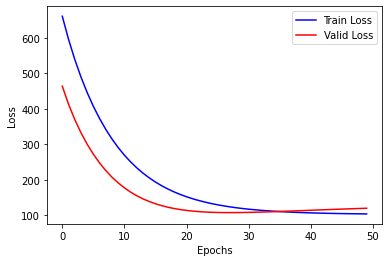

In [229]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list_train, "Blue", label="Train Loss")
plt.plot(loss_list_valid, "Red", label="Valid Loss")
plt.legend(loc=1)

## 查看损失值的损失

In [230]:
print("Test_loss: {:4f}".format(loss(x_test, y_test, W, B).numpy()))

Test_loss: 112.924339


In [234]:
test_house_id = np.random.randint(0, test_num)
y = y_test[test_house_id]

y_pred = model(x_test, W, B)[test_house_id]
y_predit = tf.reshape(y_pred, ()).numpy()
print("House ID: ", test_house_id, "Actual Value: ", y, "Predicted Value", y_predit)

House ID:  83 Actual Value:  21.8 Predicted Value 23.062122
